In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fetal_health.csv')

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df.shape

(2126, 22)

## Cardiotocogram (CTG) Feature Description

The dataset contains 2,126 rows and 22 columns. A brief description is provided below:

1. **baseline value**: The mean fetal heart rate (FHR) measured in beats per minute during stable periods.

2. **accelerations**: Number of temporary increases in FHR above baseline, indicating fetal well-being.

3. **fetal_movement**: Number of detected fetal movements, showing fetal activity level.

4. **uterine_contractions**: Number of uterine contractions detected during the monitoring period.

5. **light_decelerations**: Number of minor decreases in FHR relative to the baseline.

6. **severe_decelerations**: Number of significant drops in FHR, potentially indicating fetal distress.

7. **prolongued_decelerations**: Number of extended periods where FHR remains below baseline.

8. **abnormal_short_term_variability**: Percentage of time showing unusual beat-to-beat FHR variations.

9. **mean_value_of_short_term_variability**: Average of beat-to-beat FHR changes over short periods.

10. **percentage_of_time_with_abnormal_long_term_variability**: Proportion of time showing unusual FHR variations over longer periods.

11. **mean_value_of_long_term_variability**: Average of FHR changes over extended time periods.

12. **histogram_width**: Range of FHR values observed during monitoring.

13. **histogram_min**: Lowest FHR value recorded during the examination.

14. **histogram_max**: Highest FHR value recorded during the examination.

15. **histogram_number_of_peaks**: Count of distinct peaks in the FHR distribution.

16. **histogram_number_of_zeroes**: Count of times when no FHR was detected.

17. **histogram_mode**: Most frequently occurring FHR value.

18. **histogram_mean**: Average of all FHR values recorded.

19. **histogram_median**: Middle value of all FHR measurements when ordered.

20. **histogram_variance**: Measure of how spread out the FHR values are from their mean.

21. **histogram_tendency**: Direction of FHR change over time (increasing or decreasing).

22. **fetal_health**: Target variable classifying the health status as normal (1), suspect (2), or pathological (3).

In [6]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [8]:
df.duplicated().sum()

13

In [9]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_7440\3862648906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')


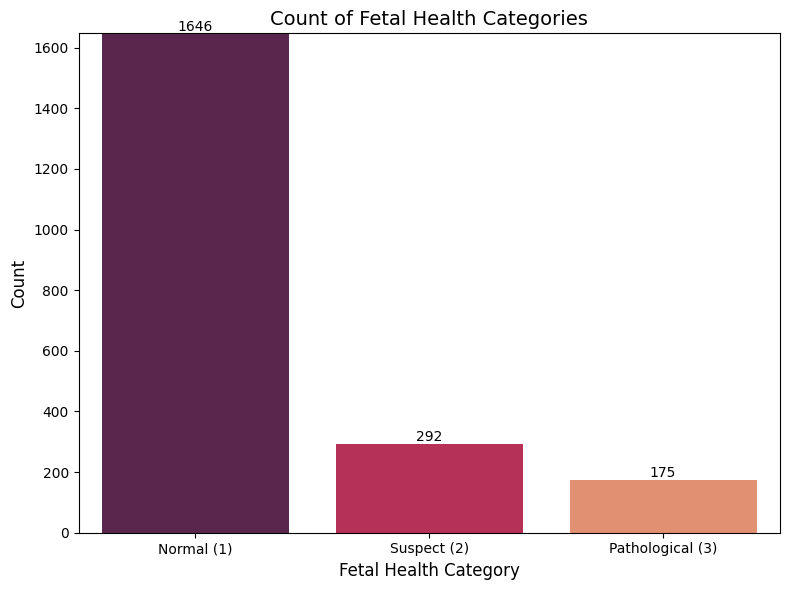

In [12]:
fetal_health_counts = df['fetal_health'].value_counts()
fetal_health_counts.index = ['Normal (1)', 'Suspect (2)', 'Pathological (3)']

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')

for i, count in enumerate(fetal_health_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Count of Fetal Health Categories', fontsize=14)
plt.xlabel('Fetal Health Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(fetal_health_counts.values) + 1)  

plt.tight_layout()
plt.show()

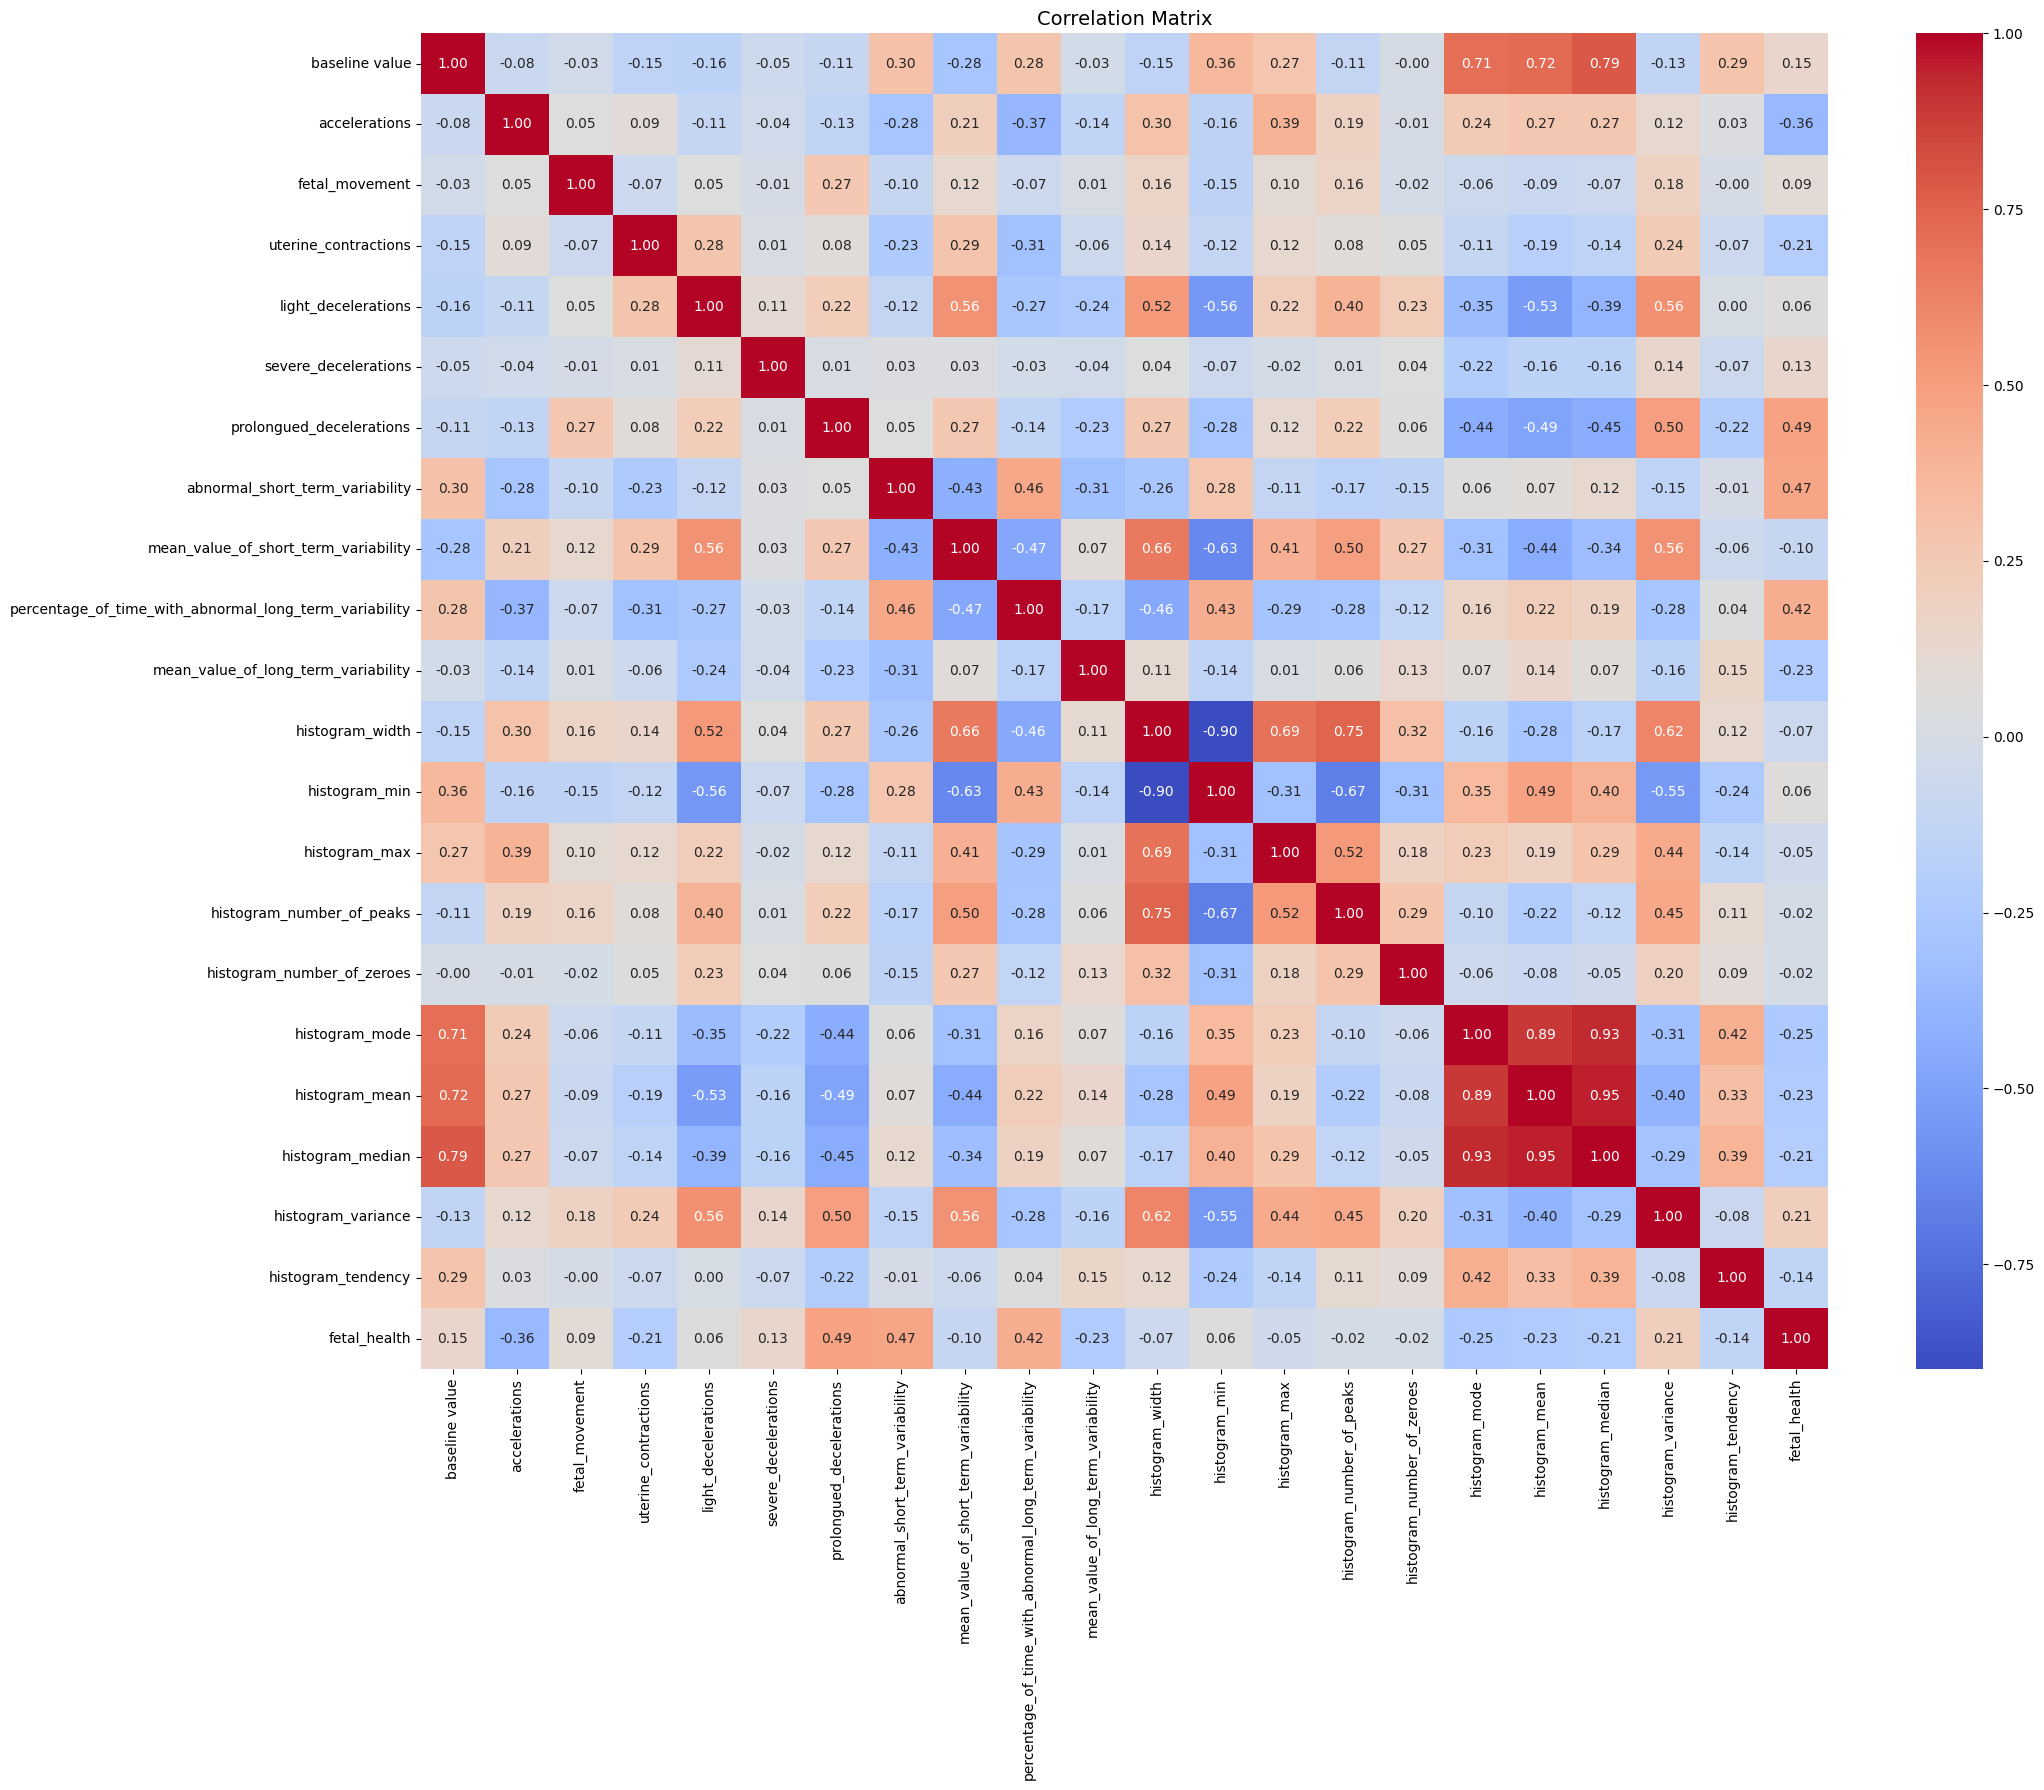

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Correlation Matrix', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

**Observations:**
Looking at the correlation matrix, we can make the following observations:

**Strong Positive Correlations (>0.7):**
* Histogram-related features show very strong correlations among themselves:
* histogram_mode, histogram_mean, and histogram_median are highly correlated (0.89-0.95)
* These metrics also correlate strongly with baseline_value (0.71-0.79)
This suggests potential redundancy in the histogram features


**Moderate to Strong Correlations with Fetal Health:**
* prolongued_decelerations (0.49)
* abnormal_short_term_variability (0.47)
* percentage_of_time_with_abnormal_long_term_variability (0.42)
These are positively correlated with worse fetal health outcomes

**Weak Correlations:**
* fetal_movement shows relatively weak correlations with most features
* severe_decelerations shows surprisingly low correlations with other features
* histogram_number_of_zeroes has weak correlations across the board

**Notable Negative Correlations:**
* accelerations (-0.36) with fetal health
* This makes clinical sense as more accelerations typically indicate better fetal health
* histogram_min shows negative correlations with several features
* mean_value_of_short_term_variability has negative correlations with abnormal variability measures

**Feature Selection Implications:**
* We can remove some highly correlated histogram features
* Should keep the deceleration and variability features as they show meaningful correlations with fetal health
* baseline_value and its correlated features might be consolidated

**Based on the correlation matrix, we will drop the following features:**
* histogram_median, histogram_mode, severe_decelerations, histogram_number_of_zeroes, fetal_movement


### Dropping the features

In [13]:
df.drop(['histogram_median', 'histogram_mode', 'severe_decelerations', 'histogram_number_of_zeroes', 'fetal_movement'], axis = 1, inplace = True)

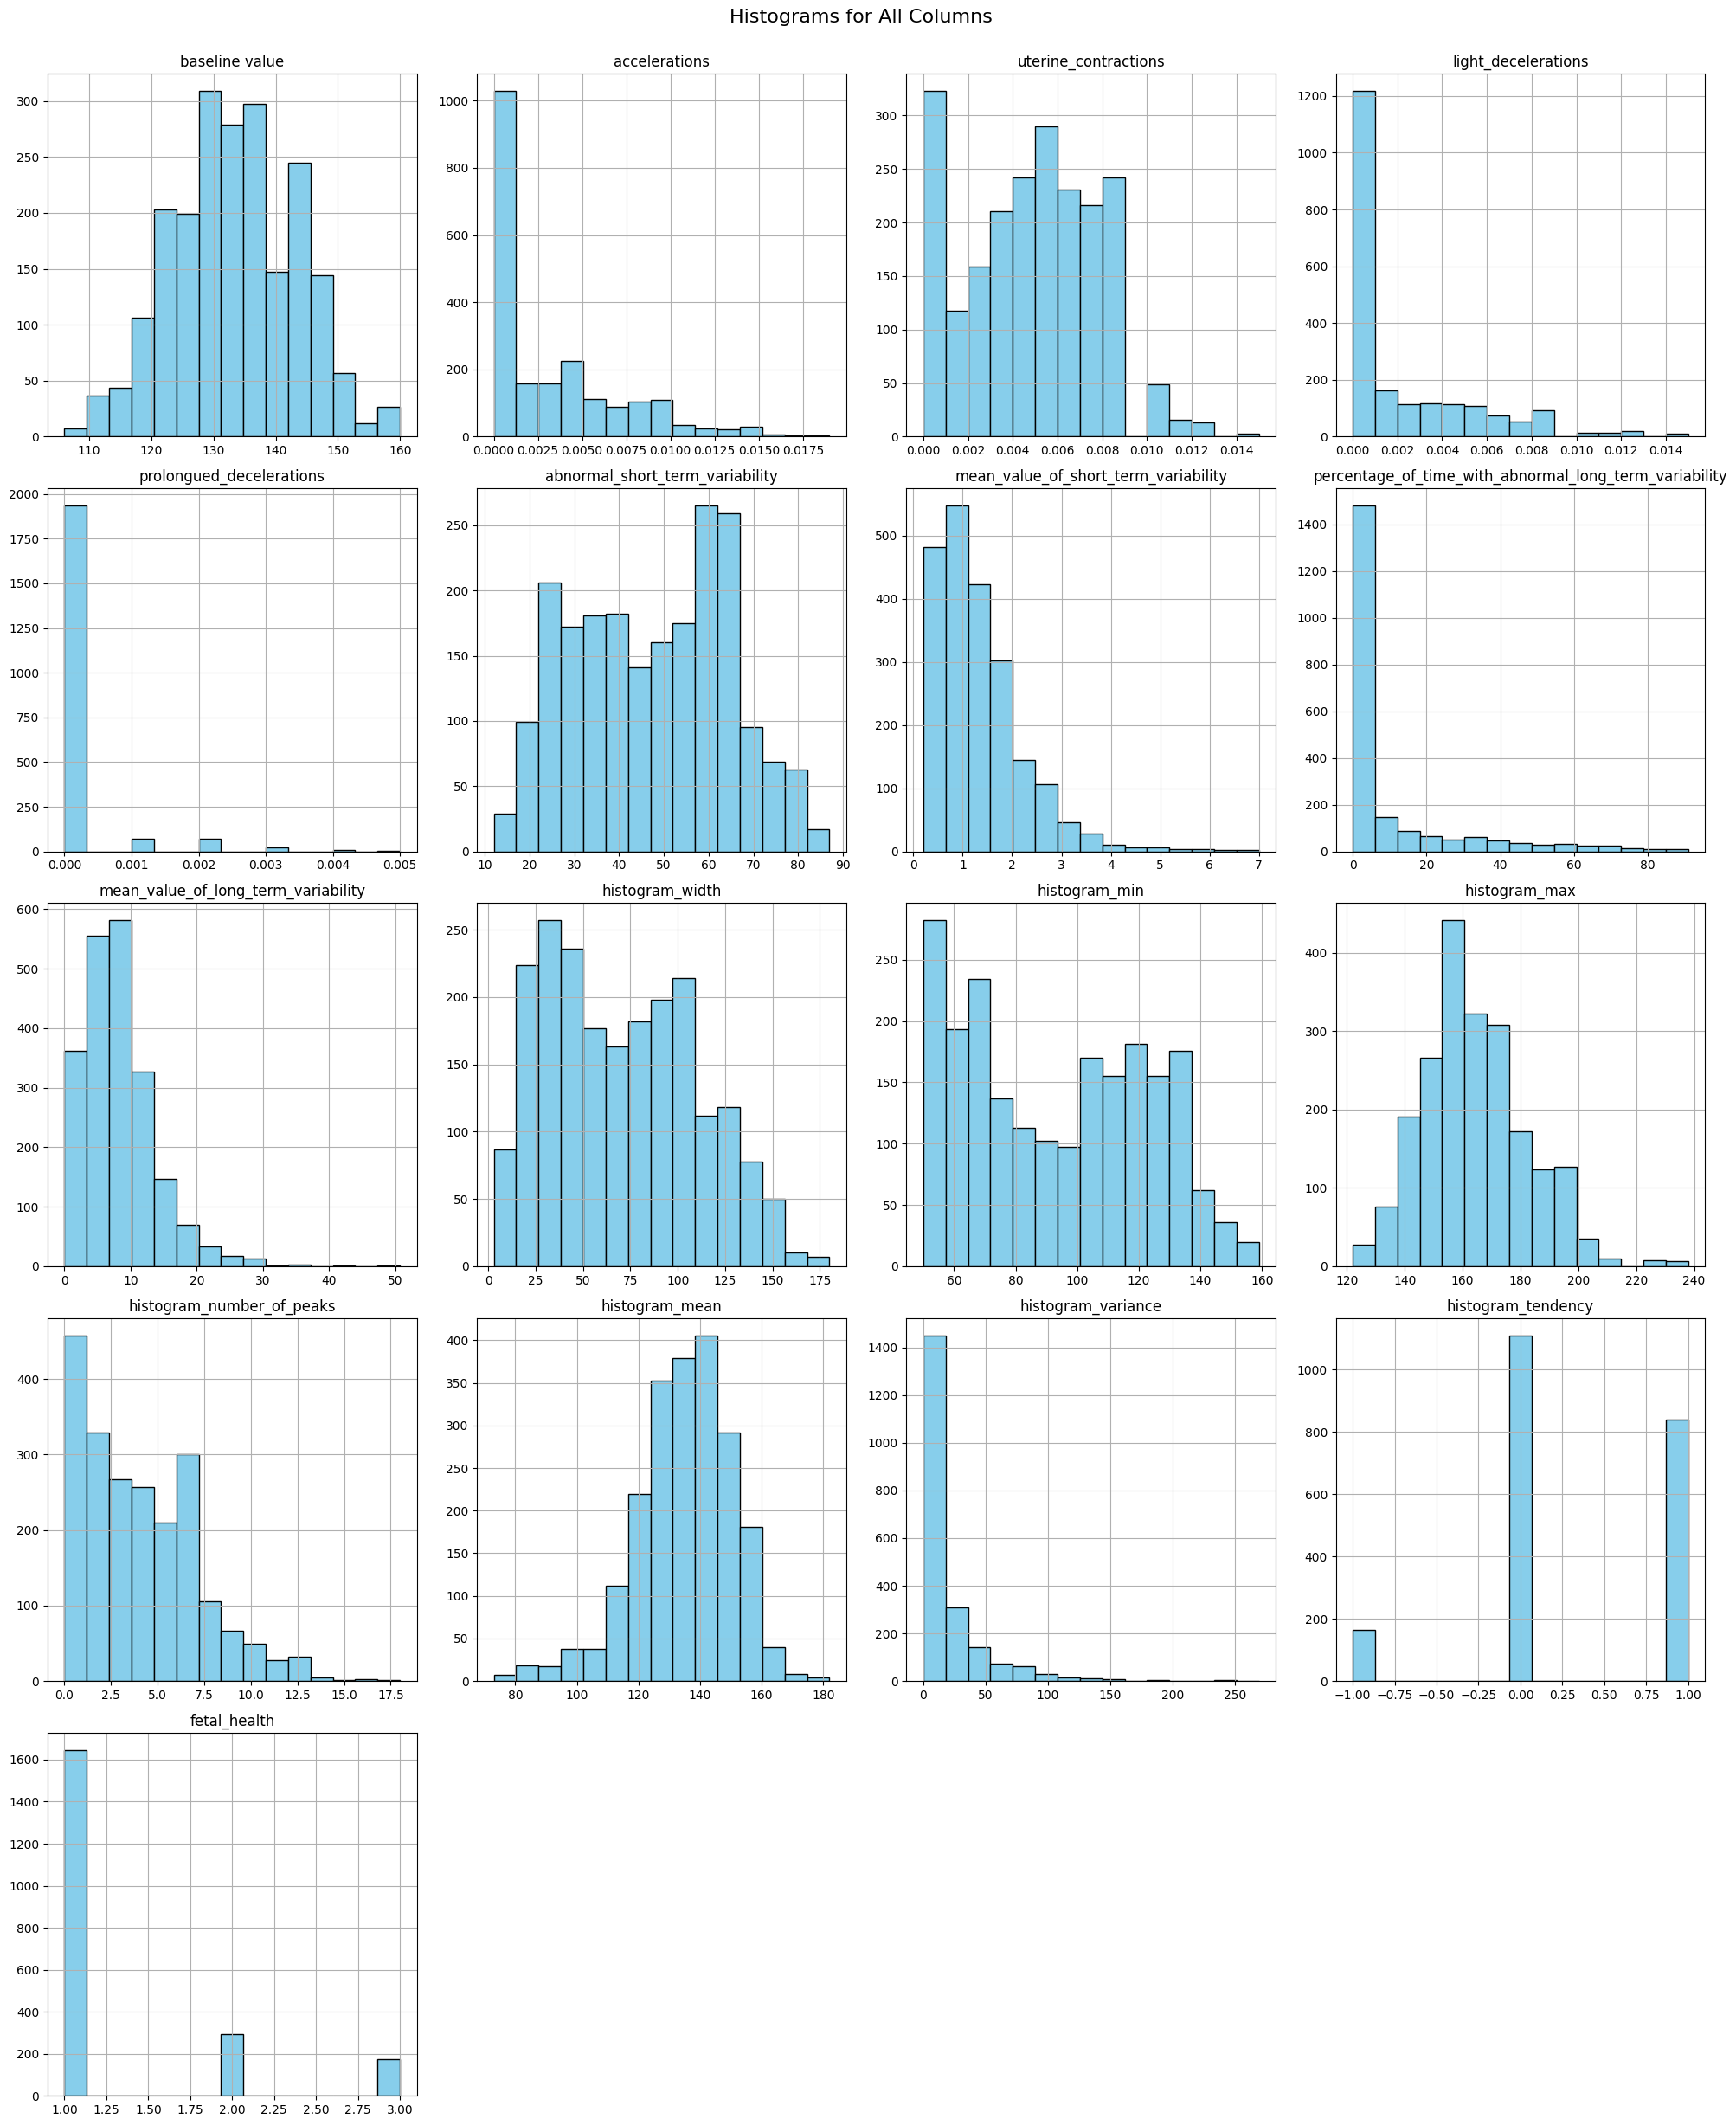

In [14]:
df.hist(figsize=(20, 25), bins=15, color='skyblue', edgecolor='black')

plt.suptitle('Histograms for All Columns', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.show()


### ANOVA Test

Let us first understand what is ANOVA Test.

The **ANOVA (Analysis of Variance) test** helps us figure out if there are significant differences between the groups we are comparing. For example, if we want to compare the test scores (or any other measurements) across different categories, ANOVA tells us:

1. **F-statistic**: 
   - This number helps us understand how much the groups differ from each other. 
   - A **high F-statistic** means the groups are really different from each other (like very different scores between groups).
   - A **low F-statistic** means the groups are similar to each other (their scores are close).

2. **p-value**:
   - This value tells us if the differences we see are **real** or just due to random chance.
   - If the **p-value is less than 0.05**, it means we can be confident that the differences we see are real and not just random.
   - If the **p-value is greater than 0.05**, it suggests that the differences might be due to random chance, and we can't be sure if there's something meaningful happening.

In simple terms:
- **F-statistic** shows us if the groups are different.
- **p-value** tells us if those differences are meaningful or just random.


ANOVA Test Results:

Top 5 Most Significant Features:
                                                    f_statistic  \
prolongued_decelerations                             507.304309   
abnormal_short_term_variability                      337.703020   
percentage_of_time_with_abnormal_long_term_vari...   335.386156   
histogram_mean                                       298.759569   
accelerations                                        194.618345   

                                                          p_value  significant  
prolongued_decelerations                            1.284117e-180         True  
abnormal_short_term_variability                     5.762476e-128         True  
percentage_of_time_with_abnormal_long_term_vari...  3.337805e-127         True  
histogram_mean                                      5.688802e-115         True  
accelerations                                        2.698959e-78         True  

Least Significant Features:
                           

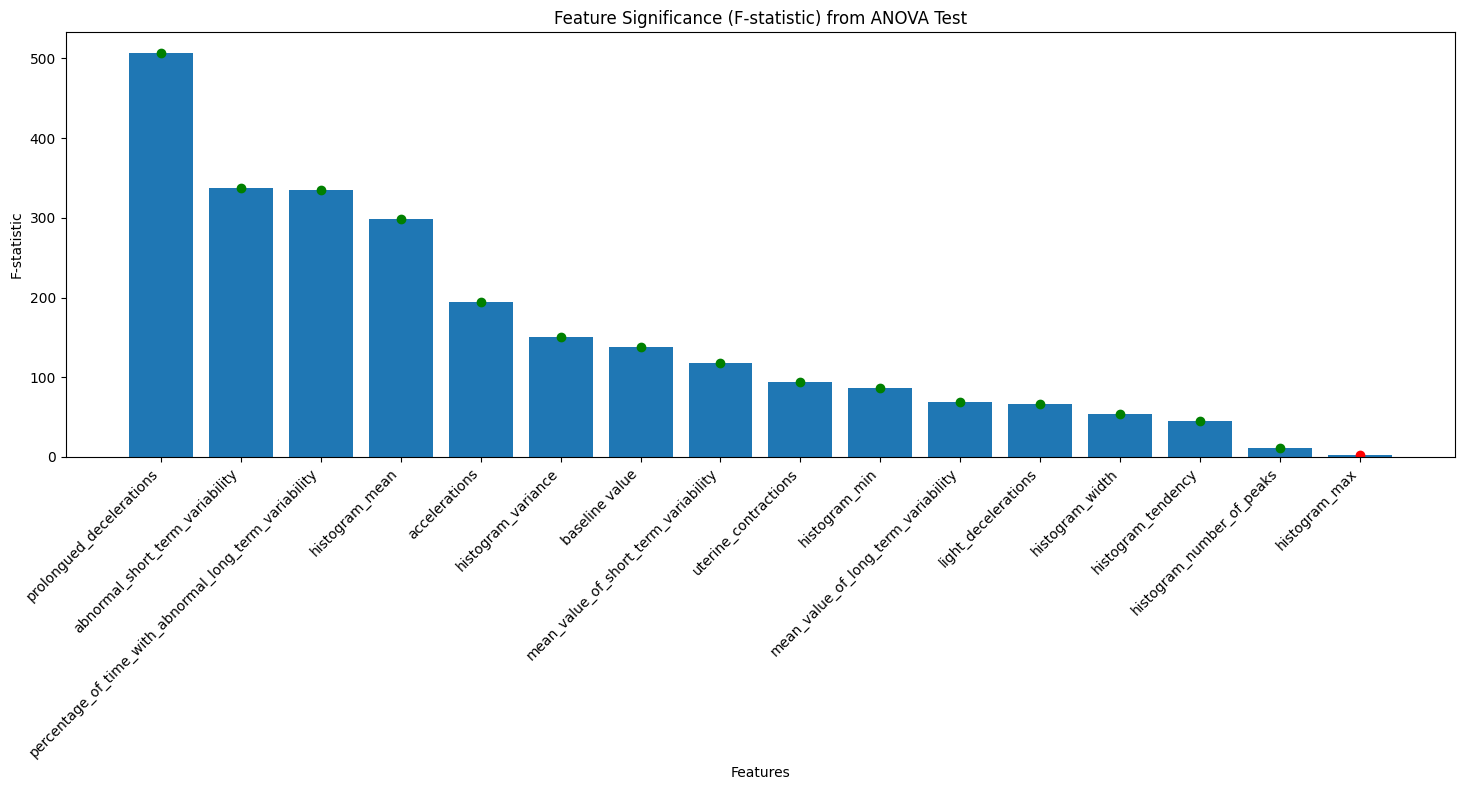


Percentage of statistically significant features: 93.75%


In [15]:
def perform_anova_analysis(df):

    anova_results = {}

    for feature in df.columns[:-1]: 
        classes = [
            group[feature].values 
            for name, group in df.groupby('fetal_health')
        ]

        f_statistic, p_value = stats.f_oneway(*classes)

        anova_results[feature] = {
            'f_statistic': f_statistic,
            'p_value': p_value
        }

    results_df = pd.DataFrame(anova_results).T
    results_df['significant'] = results_df['p_value'] < 0.05

    results_df = results_df.sort_values('f_statistic', ascending=False)
    
    return results_df

def plot_anova_results(results_df):
    
    plt.figure(figsize=(15, 8))
    plt.bar(range(len(results_df)), results_df['f_statistic'])
    plt.xticks(range(len(results_df)), results_df.index, rotation=45, ha='right')
    plt.title('Feature Significance (F-statistic) from ANOVA Test')
    plt.xlabel('Features')
    plt.ylabel('F-statistic')

    for i, significant in enumerate(results_df['significant']):
        color = 'green' if significant else 'red'
        plt.plot(i, results_df['f_statistic'].iloc[i], 'o', color=color)
    
    plt.tight_layout()
    
    return plt

results = perform_anova_analysis(df)

print("\nANOVA Test Results:")
print("\nTop 5 Most Significant Features:")
print(results.head())
print("\nLeast Significant Features:")
print(results.tail())

plot_anova_results(results)
plt.show()

significant_features = results['significant'].sum()
total_features = len(results)
print(f"\nPercentage of statistically significant features: {(significant_features/total_features)*100:.2f}%")

In [16]:
df.drop(columns=['histogram_max'], axis = 1, inplace = True)


In [17]:
df

,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_number_of_peaks,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.0,73.0,0.5,43.0,2.4,64.0,62.0,2.0,137.0,73.0,1.0,2.0
1,132.0,0.006,0.006,0.003,0.0,17.0,2.1,0.0,10.4,130.0,68.0,6.0,136.0,12.0,0.0,1.0
2,133.0,0.003,0.008,0.003,0.0,16.0,2.1,0.0,13.4,130.0,68.0,5.0,135.0,13.0,0.0,1.0
3,134.0,0.003,0.008,0.003,0.0,16.0,2.4,0.0,23.0,117.0,53.0,11.0,134.0,13.0,1.0,1.0
4,132.0,0.007,0.008,0.000,0.0,16.0,2.4,0.0,19.9,117.0,53.0,9.0,136.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.007,0.000,0.0,79.0,0.2,25.0,7.2,40.0,137.0,4.0,150.0,2.0,0.0,2.0
2122,140.0,0.001,0.007,0.000,0.0,78.0,0.4,22.0,7.1,66.0,103.0,6.0,148.0,3.0,1.0,2.0
2123,140.0,0.001,0.007,0.000,0.0,79.0,0.4,20.0,6.1,67.0,103.0,5.0,148.0,4.0,1.0,2.0
2124,140.0,0.001,0.006,0.000,0.0,78.0,0.4,27.0,7.0,66.0,103.0,6.0,147.0,4.0,1.0,2.0


In [18]:
# Separate majority and minority classes
majority_class = df['fetal_health'].value_counts().idxmax()
class_counts = df['fetal_health'].value_counts()

# Find the max count (target for resampling)
max_samples = class_counts.max()

# Resampling each class
resampled_dfs = []
for class_label, count in class_counts.items():
    class_subset = df[df['fetal_health'] == class_label]
    
    if count < max_samples:
        resampled_subset = class_subset.sample(n=max_samples, replace=True, random_state=42)
    else:
        resampled_subset = class_subset
    
    resampled_dfs.append(resampled_subset)

# Concatenate resampled subsets
df_resampled = pd.concat(resampled_dfs, axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Separate X and Y
X_resampled = df_resampled.iloc[:, :-1]
y_resampled = df_resampled['fetal_health']

print("Original Class Distribution:\n", df['fetal_health'].value_counts())
print("Resampled Class Distribution:\n", df_resampled['fetal_health'].value_counts())

Original Class Distribution:
 fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64
Resampled Class Distribution:
 fetal_health
2.0    1646
3.0    1646
1.0    1646
Name: count, dtype: int64


In [19]:
X_resampled.shape, y_resampled.value_counts()


((4938, 15),
 fetal_health
 2.0    1646
 3.0    1646
 1.0    1646
 Name: count, dtype: int64)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [21]:
X_train.shape, X_test.shape

((3456, 15), (1482, 15))

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Adjust the target values so they start from 0
y_train = y_train - 1
y_test = y_test - 1


In [32]:
X_train_scaled

array([[0.69811321, 0.        , 0.21428571, ..., 0.66055046, 0.00743494,
        0.5       ],
       [0.58490566, 0.05263158, 0.5       , ..., 0.6146789 , 0.00371747,
        0.5       ],
       [0.69811321, 0.        , 0.14285714, ..., 0.66055046, 0.01858736,
        0.5       ],
       ...,
       [0.1509434 , 0.36842105, 0.71428571, ..., 0.55045872, 0.42379182,
        0.5       ],
       [0.26415094, 0.        , 0.07142857, ..., 0.23853211, 0.14869888,
        0.        ],
       [0.75471698, 0.        , 0.21428571, ..., 0.67889908, 0.00371747,
        0.5       ]])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the train set: 3456, number of used features: 15
[LightGBM] [Info] Start training from score -1.102091
[LightGBM] [Info] Start training from score -1.080547
[LightGBM] [Info] Start training from score -1.113479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LightGBM - Accuracy: 0.9858, ROC AUC: 0.9995



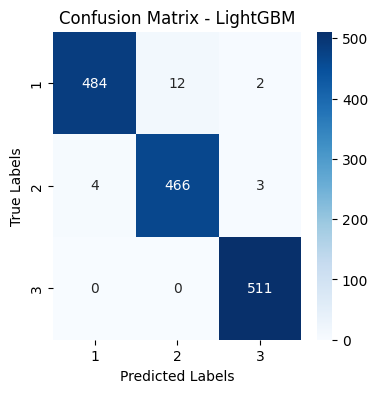


Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       498
           1       0.97      0.99      0.98       473
           2       0.99      1.00      1.00       511

    accuracy                           0.99      1482
   macro avg       0.99      0.99      0.99      1482
weighted avg       0.99      0.99      0.99      1482



Model performance:
LightGBM: Accuracy = 0.9858, ROC AUC = 0.9995


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import lightgbm as lgb

models = {
    'LightGBM': lgb.LGBMClassifier(),
}

def train_models(X_train, y_train, X_test, y_test):
    results = {}
    
    for model_name, model in models.items():
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) 
        
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate ROC AUC
        lb = LabelBinarizer()
        lb.fit(y_train)
        y_test_bin = lb.transform(y_test)
        roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
        
        results[model_name] = {
            "accuracy": accuracy,
            "roc_auc": roc_auc
        }

        print(f"\n{model_name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}\n")
        
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot Confusion Matrix
        plt.figure(figsize=(4, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
        plt.title(f"Confusion Matrix - {model_name}")
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

        # Classification Report
        print(f"\nClassification Report for {model_name}:\n")
        print(classification_report(y_test, y_pred))
        print("\n")
    
    return results

# Example usage:
results = train_models(X_train_scaled, y_train, X_test_scaled, y_test)

# Print the results for each model
print("Model performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.4f}, ROC AUC = {metrics['roc_auc']:.4f}")

In [27]:
import joblib

# Save the trained model
joblib.dump(models['LightGBM'], "fetal_health_model.sav")

# Save the scaler if used
if 'scaler' in locals():
    joblib.dump(scaler, "scaleX1.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [29]:
import joblib

scaler = joblib.load("scaleX1.pkl")
print("Scaler expected feature count:", scaler.n_features_in_)


Scaler expected feature count: 15


In [30]:
print(scaler)

MinMaxScaler()


In [33]:
import joblib
model = joblib.load("fetal_health_model.sav")
print(model.n_features_in_)


15
